# Laboratorio 6
## Universidad del Valle de Guatemala <br> Facultad de Ingeniería
#### Departamento de Ciencias de la Computación <br> Data Science - Sección 10
#### Cristian Laynez

## Problema 1 - Tráfico en la cuidad de Guatemala

In [232]:
# Importar librerias
import pandas as pd
import numpy as np
import joblib as jl
import nltk
import re
import pickle
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import json
from datetime import datetime, timezone
import ast

In [233]:
from nltk import bigrams
from nltk import ngrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [234]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC

In [235]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [237]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\crist\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [238]:
stop_words = set(stopwords.words('spanish'))
stop_words

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

#### 2. Cargar el archivo de datos.

In [239]:
data_frame = pd.read_csv('./data/traficogt.csv', encoding='utf-8')
data_frame

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,12626,1237533600368562176,1237533600368562176,https://twitter.com/SoyGtm/status/123753360036...,2020-03-11 00:19:37+00:00,"{'id': 3729523453, 'id_str': '3729523453', 'ur...",es,Alguien sabe que paso en la 7av z9. Llevo 45 m...,0,0,...,NaN,"{'id': '13d479b108707983', 'fullName': 'Guatem...",NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
12627,12627,1237513419122593794,1237513419122593794,https://twitter.com/arturocampos61/status/1237...,2020-03-10 22:59:25+00:00,"{'id': 144944157, 'id_str': '144944157', 'url'...",es,Pregunta sería para @amilcarmontejo los inefic...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
12628,12628,1237443272445960197,1237443272445960197,https://twitter.com/C_J_El_Lobo/status/1237443...,2020-03-10 18:20:41+00:00,"{'id': 1852058552, 'id_str': '1852058552', 'ur...",es,fuerte congestionamiento en diagonal 6 provoca...,0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
12629,12629,1237356194957754368,1237356194957754368,https://twitter.com/ElCan

In [240]:
# Ver todas las columnas
data_frame_columns = data_frame.columns.tolist()
data_frame_columns

['Unnamed: 0',
 'id',
 'id_str',
 'url',
 'date',
 'user',
 'lang',
 'rawContent',
 'replyCount',
 'retweetCount',
 'likeCount',
 'quoteCount',
 'conversationId',
 'hashtags',
 'cashtags',
 'mentionedUsers',
 'links',
 'viewCount',
 'retweetedTweet',
 'quotedTweet',
 'place',
 'coordinates',
 'inReplyToTweetId',
 'inReplyToUser',
 'source',
 'sourceUrl',
 'sourceLabel',
 'media',
 '_type']

#### 3. Limpie y preprocese los datos (Describir de forma detallada las actividades de preprocesamiento que se llevó a cabo)

In [241]:
list_usernames = []
list_raw_descriptions = []
# username, displayname, rawDescription
for user_value in data_frame["user"]:
    username_pattern = r"'username': '([^']+)'"
    raw_description_pattern = r"'rawDescription': '([^']+)'"

    usernames = re.findall(username_pattern, user_value)
    raw_descriptions = re.findall(raw_description_pattern, user_value)
    
    list_usernames.append(usernames[0])
    list_raw_descriptions.append("-1" if len(raw_descriptions) == 0 else raw_descriptions[0])

In [242]:
data_frame["username"] = list_usernames
data_frame["rawDescription"] = list_raw_descriptions

In [243]:
# Eliminar las siguientes columnas
columns_to_delete = [
    "Unnamed: 0", "url", "id_str", "coordinates", 
    "inReplyToTweetId", "inReplyToUser", "media",
    "_type", "conversationId", "cashtags", "links",
    "retweetedTweet", "id", "user",
    "mentionedUsers", "source", "sourceUrl", "quotedTweet"
]

for column in columns_to_delete:
    if column in data_frame_columns:
        data_frame.drop(column, inplace=True, axis=1)

In [244]:
data_frame

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription
0,2023-09-12 17:49:21+00:00,es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,8,0,"['AHORA', 'TráficoGT']",6645.0,NaN,TweetDeck Web App,EmisorasUnidas,"Primera en Noticias, Primera en Deportes. Sigu..."
1,2023-09-12 17:39:52+00:00,es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,524,49,[],163347.0,NaN,Twitter for iPhone,amilcarmontejo,Vocero vial en Municipalidad Guatemala. Inform...
2,2023-09-11 21:34:15+00:00,es,Camión de arena volteado en el viaducto el pul...,2,1,4,0,"['transitogt', 'traficogt']",1033.0,NaN,Twitter for Android,edgarduarteagui,"Paleolibertarian, traditionalist, communitaria..."
3,2023-09-13 16:26:49+00:00,es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,95,0,[],49375.0,NaN,advertiser-interface,DrDavidCabrera,"Médico especialista en medicina deportiva, reh..."
4,2023-09-11 12:49:36+00:00,es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,20,0,"['AHORA', 'TráficoGT']",4823.0,NaN,TweetDeck Web App,EmisorasUnidas,"Primera en Noticias, Primera en Deportes. Sigu..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,2020-03-11 00:19:37+00:00,es,Alguien sabe que paso en la 7av z9. Llevo 45 m...,0,0,0,0,"['TraficoGT', 'TransitoGT']",NaN,"{'id': '13d479b108707983', 'fullName': 'Guatem...",Twitter for Android,SoyGtm,Con firmes esperanzas de que tendremos un mejo...
12627,2020-03-10 22:59:25+00:00,es,Pregunta sería para @amilcarmontejo los inefic...,0,0,3,0,['TraficoGT'],NaN,NaN,Twitter for Android,arturocampos61,"🇬🇹 Cucurucho, Dominico, Amo a 🇬🇹 GUATEMALA 🇬🇹A..."
12628,2020-03-10 18:20:41+00:00,es,fuerte congestionamiento en diagonal 6 provoca...,0,0,9,0,['TraficoGT'],NaN,NaN,Twitter for Android,C_J_El_Lobo,"Moleston, Vulgar Sarcástico, Casaquero Gracios..."
12629,2020-03-10 12:34:40+00:00,es,Don @amilcarmontejo los motoristas aquí en la ...,3,2,13,0,['traficogt'],NaN,NaN,Twitter for iPhone,ElCancheArriaza,Hago música en Cinema Tiger. Link en bio.


In [245]:
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

In [246]:
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [247]:
def get_stemmed_text(text):    
    stemmer = PorterStemmer()
    words = word_tokenize(text)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

In [248]:
def apply_lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [249]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [250]:
def clean_all_text_of_column(column_name : str):
    # Convertir el texto en minúsculas
    data_frame[column_name] = data_frame[column_name].str.lower()

    # Quitar caracteres especiales “#”,”@” o los apóstrofes
    data_frame[column_name] = data_frame[column_name].str.replace(r'[#@\'"]', '', regex=True)

    # Quitar urls
    data_frame[column_name] = data_frame[column_name].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', regex=True)

    # Eliminar signos de puntuacion
    data_frame[column_name] = data_frame[column_name].str.replace(r'[^\w\s]', '', regex=True)

    # Revisar si hay emojis en el texto y luego quitarlos
    data_frame[column_name] = data_frame[column_name].apply(remove_emojis)

    # Quitar los artículos, preposiciones y conjunciones (stopwords)
    data_frame[column_name] = data_frame[column_name].apply(remove_stopwords)

    # Normalizar las palabras para tratar de convertir todas las palabras encontradas en solo una palabra
    data_frame[column_name] = data_frame[column_name].apply(get_stemmed_text)

    # Aplicar la función de lematización al atributo 'text' para identificar la parte
    # del discurso de una palabra determinada y luego aplicando reglas más complejas 
    # para transformar la palabra en su verdadera raíz
    data_frame[column_name] = data_frame[column_name].apply(apply_lemmatization)

    # # Quitar los numeros para evitar que interfieran en el análisis
    # data_frame[column_name] = data_frame[column_name].apply(remove_numbers)

In [251]:
clean_all_text_of_column("rawContent")
clean_all_text_of_column("rawDescription")

In [252]:
# Convertir las cadenas de hashtags en listas
data_frame['hashtags'] = data_frame['hashtags'].apply(ast.literal_eval)
data_frame['hashtags']

0             [AHORA, TráficoGT]
1                             []
2        [transitogt, traficogt]
3                             []
4             [AHORA, TráficoGT]
                  ...           
12626    [TraficoGT, TransitoGT]
12627                [TraficoGT]
12628                [TraficoGT]
12629                [traficogt]
12630                [TraficoGT]
Name: hashtags, Length: 12631, dtype: object

In [253]:
# Convertir los NaN de viewCount en "-1"
data_frame['viewCount'].fillna(-1.0, inplace=True)

In [254]:
# Convertir los NaN de place en "{}"
data_frame['place'].fillna("{}", inplace=True)

In [255]:
data_frame

,date,lang,rawContent,replyCount,retweetCount,likeCount,quoteCount,hashtags,viewCount,place,sourceLabel,username,rawDescription
0,2023-09-12 17:49:21+00:00,es,ahora amílcar montejo director comunicación em...,1,2,8,0,"[AHORA, TráficoGT]",6645.0,{},TweetDeck Web App,EmisorasUnidas,primera noticia primera deport sigu toda infor...
1,2023-09-12 17:39:52+00:00,es,conductora negó movilizar vehículo multada cal...,149,78,524,49,[],163347.0,{},Twitter for iPhone,amilcarmontejo,vocero vial municipalidad guatemala informació...
2,2023-09-11 21:34:15+00:00,es,camión arena volteado viaducto pulté hacia hac...,2,1,4,0,"[transitogt, traficogt]",1033.0,{},Twitter for Android,edgarduarteagui,paleolibertarian traditionalist communitarian ...
3,2023-09-13 16:26:49+00:00,es,pacient 39 año dolor lumbar 1 año tra caída hi...,3,17,95,0,[],49375.0,{},advertiser-interface,DrDavidCabrera,médico especialista medicina deportiva rehabil...
4,2023-09-11 12:49:36+00:00,es,ahora amílcar montejo director comunicación em...,0,0,20,0,"[AHORA, TráficoGT]",4823.0,{},TweetDeck Web App,EmisorasUnidas,primera noticia primera deport sigu toda infor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,2020-03-11 00:19:37+00:00,es,alguien sabe paso 7av z9 llevo 45 minuto parad...,0,0,0,0,"[TraficoGT, TransitoGT]",-1.0,"{'id': '13d479b108707983', 'fullName': 'Guatem...",Twitter for Android,SoyGtm,firm esperanza mejor paí niego tener esperanza...
12627,2020-03-10 22:59:25+00:00,es,pregunta amilcarmontejo ineficient agent manej...,0,0,3,0,[TraficoGT],-1.0,{},Twitter for Android,arturocampos61,cucurucho dominico amo guatemala apasionado de...
12628,2020-03-10 18:20:41+00:00,es,fuert congestionamiento diagon 6 provocado cam...,0,0,9,0,[TraficoGT],-1.0,{},Twitter for Android,C_J_El_Lobo,moleston vulgar sarcástico casaquero gracioson...
12629,2020-03-10 12:34:40+00:00,es,don amilcarmontejo motorista aquí calzada paz ...,3,2,13,0,[traficogt],-1.0,{},Twitter for iPhone,ElCancheArriaza,hago música cinema tiger link bio


#### 4. Análisis exploratorio y serie de insights que se puedan seguir investigando

In [256]:
# En los idiomas donde se habla del tráfico de Guatemala
lang_count = data_frame["lang"].value_counts()
lang_count

lang
es     11946
en       600
zxx       24
fr         9
qme        8
it         6
pt         6
ca         5
in         4
lt         4
qht        3
ja         3
ar         2
art        2
ko         2
eu         2
ru         1
et         1
de         1
tr         1
th         1
Name: count, dtype: int64

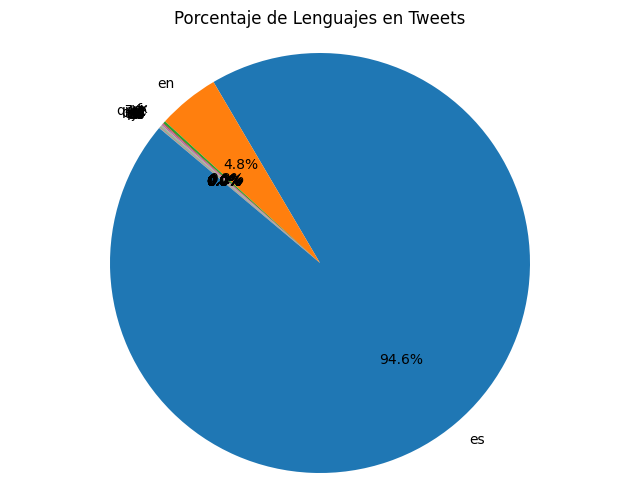

In [257]:
plt.figure(figsize=(8, 6))
plt.pie(lang_count, labels=lang_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de Lenguajes en Tweets')
plt.axis('equal')

plt.show()

Como se puede observar el 94.6% de los tweets se crean en el lenguaje español, solo el 4.8% creo tweets en inglés, el resto de los lenguajes estan en menos del 1%.

In [258]:
# Cantidad de dispositivos en donde crean los tweets
data_frame["sourceLabel"].value_counts()

sourceLabel
Twitter for Android               5737
Twitter for iPhone                2743
Twitter Web App                   1772
TweetDeck                         1292
advertiser-interface               358
TweetDeck Web App                  243
Twitter for Advertisers            237
simpleads-ui                        37
Twitter for iPad                    30
Twitter Media Studio                24
Hootsuite Inc.                      14
Sprinklr Publishing                 12
Оwly                                12
Twitter Web Client                  11
Buffer                              10
Periscope                            9
OneSight                             8
Tweet Hunter Pro                     8
SocialFlow                           7
Twitter Ads                          7
erased972529_fzyRVGtcON              7
Instagram                            6
erased5434447                        6
lahoragt1644885914282258435          6
Emplifi                              5
hivemedia-ads

Se puede apreciar que cuando se crean tweets respecto al tráfico se crean en dispositivos móviles.

In [259]:
spanish_tweets_content = data_frame[data_frame["lang"] == "es"]["rawContent"]

tokens_spanish_tweets_content = word_tokenize(' '.join(spanish_tweets_content))

freq_spanish_tweets_content = FreqDist(tokens_spanish_tweets_content)

print("Palabras más comunes en el contenido de los tweets en español del tráfico en Guatemala")
for word, frequency in freq_spanish_tweets_content.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en el contenido de los tweets en español del tráfico en Guatemala
=> |amilcarmontejo| : 5436
=> |traficogt| : 4289
=> |barevalodeleon| : 3119
=> |zona| : 2542
=> |sandratorresgua| : 2510
=> |tráficogt| : 1798
=> |call| : 1591
=> |vía| : 1578
=> |avenida| : 1462
=> |si| : 965
=> |ahora| : 953
=> |transitogt| : 874
=> |guatemala| : 799
=> |drgiammattei| : 757
=> |partidoun| : 685
=> |vehículo| : 664
=> |1| : 645
=> |munigu| : 644
=> |msemillagt| : 566
=> |hacia| : 559


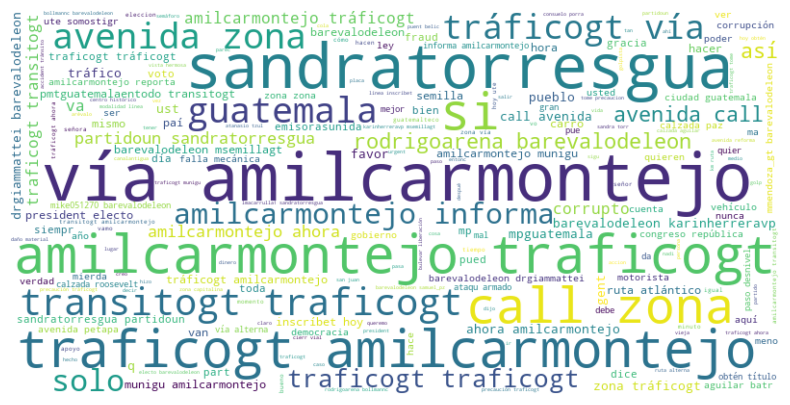

In [260]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawContent"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=200,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

Se puede ver que en la información más relevante se encuentra en el contenido del tweet, varios de las palabras que se mencionan mucho a "amilcarmontejo" y se mencionan mucho a los candidatos para presidente como a Sandra Torres, el presidente actual Alejandro Giammattei y se habla un poco de movimiento semilla. Esto hace mucho sentido ya que por este tipo de palabras encontradas se puede entender que por las manifestaciones hechas o por que ellos fueron los causantes de esto hace que exista mucho tráfico en Guatemala.

In [261]:
spanish_tweets_description = data_frame[data_frame["lang"] == "es"]["rawDescription"]

tokens_spanish_tweets_description = word_tokenize(' '.join(spanish_tweets_description))

freq_spanish_tweets_description = FreqDist(tokens_spanish_tweets_description)

print("Palabras más comunes en la descripción de los tweets en español del tráfico en Guatemala")
for word, frequency in freq_spanish_tweets_description.most_common(20):
    print(f"=> |{word}| : {frequency}")

Palabras más comunes en la descripción de los tweets en español del tráfico en Guatemala
=> |1| : 3199
=> |guatemala| : 1877
=> |noticia| : 1086
=> |vida| : 881
=> |información| : 878
=> |mundo| : 857
=> |primera| : 750
=> |mejor| : 725
=> |toda| : 630
=> |deport| : 477
=> |diario| : 417
=> |líder| : 394
=> |guatemalaneleccion| : 392
=> |nsuscríbas| : 392
=> |únase| : 392
=> |telegram| : 392
=> |sigu| : 388
=> |comprometido| : 383
=> |noticiosa| : 373
=> |canal| : 349


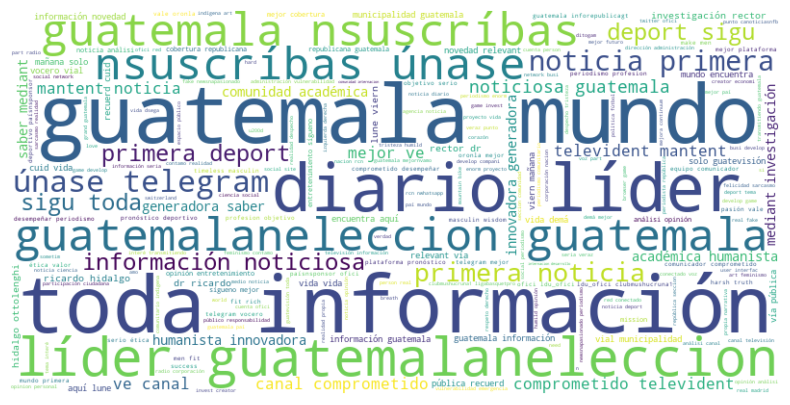

In [262]:
# Combina todos los textos en uno solo (si tus textos están en una lista)
combined_text_rawContent = ' '.join(data_frame["rawDescription"])

# Configura la nube de palabras
wordcloud = WordCloud(
    background_color='white',  # Color del fondo
    width=800, height=400,     # Tamaño de la imagen de la nube de palabras
    max_words=200,             # Número máximo de palabras en la nube
).generate(combined_text_rawContent)

# Muestra la nube de palabras en una figura de matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta los ejes
plt.show()

En la descripciones no se encontró mucha información relevante, solamente se encontró nombres de redes sociales o de noticieros.

In [263]:
# Vamos a ver bigramas
bigrams_spanish_tweets_content = list(bigrams(tokens_spanish_tweets_content))

freq_bigrams_spanish_tweets_content = FreqDist(bigrams_spanish_tweets_content)

print('Bigramas más comunes en tweets de desastres:')
for word, frequency in freq_bigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Bigramas más comunes en tweets de desastres:
('vía', 'amilcarmontejo'): 1095
('amilcarmontejo', 'traficogt'): 840
('traficogt', 'amilcarmontejo'): 796
('call', 'zona'): 692
('transitogt', 'traficogt'): 480
('zona', '1'): 467
('avenida', 'zona'): 412
('tráficogt', 'vía'): 400
('traficogt', 'traficogt'): 333
('amilcarmontejo', 'informa'): 332
('rodrigoarena', 'barevalodeleon'): 325
('amilcarmontejo', 'ahora'): 324
('partidoun', 'sandratorresgua'): 303
('zona', '10'): 289
('amilcarmontejo', 'tráficogt'): 265
('zona', '11'): 254
('traficogt', 'transitogt'): 254
('barevalodeleon', 'karinherreravp'): 253
('ahora', 'amilcarmontejo'): 225
('drgiammattei', 'barevalodeleon'): 208


In [264]:
# Vamos a ver trigramas de 3 palabras
trigrams_spanish_tweets_content = list(ngrams(tokens_spanish_tweets_content, 3))

freq_trigrams_spanish_tweets_content = FreqDist(trigrams_spanish_tweets_content)

print('Trigramas de 3 palabras más comunes en tweets en español de tráfico:')
for word, frequency in freq_trigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 3 palabras más comunes en tweets en español de tráfico:
('tráficogt', 'vía', 'amilcarmontejo'): 388
('vía', 'amilcarmontejo', 'ahora'): 238
('call', 'zona', '1'): 231
('ahora', 'amilcarmontejo', 'informa'): 163
('pmtguatemalaentodo', 'transitogt', 'traficogt'): 157
('vía', 'amilcarmontejo', 'tráficogt'): 126
('transitogt', 'traficogt', 'amilcarmontejo'): 106
('inscríbet', 'hoy', 'ute'): 99
('vía', 'amilcarmontejo', 'traficogt'): 98
('call', 'zona', '10'): 98
('modalidad', 'línea', 'inscríbet'): 94
('línea', 'inscríbet', 'hoy'): 94
('inscríbet', 'hoy', 'obtén'): 90
('hoy', 'obtén', 'título'): 90
('mmendoza_gt', 'barevalodeleon', 'drgiammattei'): 89
('call', 'zona', '12'): 87
('tráficogt', 'ahora', 'amilcarmontejo'): 81
('traficogt', 'transitogt', 'amilcarmontejo'): 81
('calzada', 'aguilar', 'batr'): 79
('traficogt', 'amilcarmontejo', 'traficogt'): 77


In [265]:
# Vamos a ver trigramas de 4 palabras
trigrams_spanish_tweets_content = list(ngrams(tokens_spanish_tweets_content, 4))

freq_trigrams_spanish_tweets_content = FreqDist(trigrams_spanish_tweets_content)

print('Trigramas de 4 palabras más comunes en tweets en español de tráfico:')
for word, frequency in freq_trigrams_spanish_tweets_content.most_common(20):
    print(f'{word}: {frequency}')

Trigramas de 4 palabras más comunes en tweets en español de tráfico:
('tráficogt', 'vía', 'amilcarmontejo', 'ahora'): 192
('modalidad', 'línea', 'inscríbet', 'hoy'): 94
('línea', 'inscríbet', 'hoy', 'ute'): 94
('inscríbet', 'hoy', 'obtén', 'título'): 90
('tráficogt', 'ahora', 'amilcarmontejo', 'informa'): 68
('drgiammattei', 'barevalodeleon', 'karinherreravp', 'msemillagt'): 61
('barevalodeleon', 'karinherreravp', 'msemillagt', 'jeanellydvg'): 61
('daño', 'material', 'tráficogt', 'vía'): 60
('material', 'tráficogt', 'vía', 'amilcarmontejo'): 60
('inscríbet', 'hoy', 'ute', 'somostigr'): 60
('quorumgt', 'drgiammattei', 'barevalodeleon', 'karinherreravp'): 59
('vicentecarrera_', 'sarmientowski', 'barevalodeleon', 'msemillagt'): 57
('pmtguatemalaentodo', 'transitogt', 'traficogt', 'tráficogt'): 53
('solo', 'daño', 'material', 'tráficogt'): 52
('vía', 'alterna', 'evitar', 'tráfico'): 48
('guatemalagob', 'shirleyriveragt', 'barevalodeleon', 'rocasgt'): 48
('shirleyriveragt', 'barevalodeleon'

Los trigramas dieron más contexto de lo que se suele hablar en el tráfico y del porque.

In [266]:
# Aplanar la lista de hashtags
flattened_hashtags = data_frame['hashtags'].explode()

# Calcular el conteo de los hashtags
hashtag_counts = flattened_hashtags.value_counts()

# Seleccionar los 10 hashtags más repetidos (puedes ajustar el número según tus necesidades)
top_10_hashtags = hashtag_counts.head(20)

top_10_hashtags

hashtags
TraficoGT                2926
TráficoGT                1631
TransitoGT                769
traficogt                 709
AHORA                     610
UTE                       208
SomosTigres               208
PMTGuatemalaEnTodo        196
Guatemala                 171
FrenemosLosAccidentes     147
MuniGuate                 143
TraficoGt                  92
traficoGT                  83
transitogt                 76
Ahora                      75
tráficoGT                  74
Traficogt                  70
MejorasTuMejoraTodo        68
TráficoGt                  61
JuntosLogramosMás          60
Name: count, dtype: int64

In [286]:
# Tendencias de las cuentas
df_top_counts = data_frame.sort_values(by="viewCount", ascending=False)
df_top_counts = df_top_counts[df_top_counts["viewCount"] != -1.0]
df_top_counts = df_top_counts[df_top_counts["lang"] == "es"]
df_top_counts = df_top_counts.drop_duplicates(subset="username", keep=False)
df_top_counts[["date", "username", "rawContent", "hashtags", "viewCount"]].head(20)

,date,username,rawContent,hashtags,viewCount
7278,2023-08-23 02:04:31+00:00,shitpene,messi despué perder final mundo,[],3517583.0
7419,2023-08-22 19:57:36+00:00,Libro_negro_,nacion entra robar tienda empleada deja encerr...,[NACIONAL],2748046.0
1253,2023-08-25 15:05:38+00:00,InformaCosmos,imagen aterradora astronauta bruce mccandless ...,[],2232708.0
1061,2023-09-04 17:33:47+00:00,RocheLatam,únete generacióndelcambio rochepressday2023 sé...,"[GeneraciónDelCambio, RochePressDay2023, Mujer...",1907276.0
7879,2023-08-17 16:32:19+00:00,VozdeAmerica,aliado incómodo pelea partido comunista venezu...,[],1191094.0
6491,2023-08-24 19:45:22+00:00,noficciongt,urgent respecto medida cautelar cidh otorgó ho...,[URGENTE],556765.0
9088,2023-09-10 14:18:23+00:00,fedefut_oficial,nota aclaratoria,[],509152.0
7984,2023-09-11 16:10:08+00:00,eintracht_esp,película campeón sabía starplusla pued encontr...,"[SGEuropa, SGE, UEL]",495362.0
7018,2023-08-23 15:20:55+00:00,rebkrriaza,tanta paja decir votó partido hijo joder,[],375916.0
3794,2023-09-12 16:03:05+00:00,sainzcaccia,cambio inspiran guadalajara cambió 6 carril co...,[],365465.0


In [268]:
# Datos a lo largo del tiempo

#### 5. Preguntas

##### ¿Cómo ha venido a complicar el tráfico en toda la cuidad la épica de lluvia?

##### ¿El socavón de zona 5 ha tenido un impacto importante en el tráfico de la zona de la universidad?

#### 6. Conclusiones